<a href="https://colab.research.google.com/github/danielecci/BigDataEcci/blob/main/Car_Recommended_Engine_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors

In [2]:
#Librerias
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as MAE,r2_score

import lightgbm as lgb

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
from sklearn.metrics import classification_report

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
cols = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
        "num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base",
        "length", "width", "height", "curb_weight", "engine_type",
        "num_cylinders", "engine_size", "fuel_system", "bore", "stroke",
        "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]
data = pd.read_csv(url, names=cols)


In [4]:
print(data.shape)
data.head()

(205, 26)


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [6]:
#Valores nulos y en que medidad
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [7]:
# eliminar los valores nulos de la columna price
data['price'] = data['price'].dropna()

In [8]:
#pd.to_numeric() de pandas para convertir las columnas 'price' y 'horsepower'
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

In [9]:
#Recorre todas las columnas del DataFrame data que tienen un tipo de datos object y las convierte en categorías utilizando el método astype('category').
for col in data.select_dtypes(include=['object']).columns:
  data[col] = data[col].astype('category')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          205 non-null    int64   
 1   normalized_losses  205 non-null    category
 2   make               205 non-null    category
 3   fuel_type          205 non-null    category
 4   aspiration         205 non-null    category
 5   num_doors          205 non-null    category
 6   body_style         205 non-null    category
 7   drive_wheels       205 non-null    category
 8   engine_location    205 non-null    category
 9   wheel_base         205 non-null    float64 
 10  length             205 non-null    float64 
 11  width              205 non-null    float64 
 12  height             205 non-null    float64 
 13  curb_weight        205 non-null    int64   
 14  engine_type        205 non-null    category
 15  num_cylinders      205 non-null    category
 16  engine_s

In [11]:
#Valores nulos y en que medidad
data.isna().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           2
peak_rpm             0
city_mpg             0
highway_mpg          0
price                4
dtype: int64

In [12]:
#eliminará todas las filas que contienen al menos un valor nulo y actualizará el DataFrame original.
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          199 non-null    int64   
 1   normalized_losses  199 non-null    category
 2   make               199 non-null    category
 3   fuel_type          199 non-null    category
 4   aspiration         199 non-null    category
 5   num_doors          199 non-null    category
 6   body_style         199 non-null    category
 7   drive_wheels       199 non-null    category
 8   engine_location    199 non-null    category
 9   wheel_base         199 non-null    float64 
 10  length             199 non-null    float64 
 11  width              199 non-null    float64 
 12  height             199 non-null    float64 
 13  curb_weight        199 non-null    int64   
 14  engine_type        199 non-null    category
 15  num_cylinders      199 non-null    category
 16  engine_size  

In [13]:
# Preprocessing
categorical_features = ['make', 'fuel_type', 'body_style', 'drive_wheels']
numeric_features = ['wheel_base', 'length', 'engine_size', 'horsepower']

selected_columns = categorical_features + numeric_features
new_data = data[selected_columns]

# Display the first few rows of the new dataset
new_data.head()

# Standarization (both categorical and numerical variables)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

In [14]:
new_data

,make,fuel_type,body_style,drive_wheels,wheel_base,length,engine_size,horsepower
0,alfa-romero,gas,convertible,rwd,88.6,168.8,130,111.0
1,alfa-romero,gas,convertible,rwd,88.6,168.8,130,111.0
2,alfa-romero,gas,hatchback,rwd,94.5,171.2,152,154.0
3,audi,gas,sedan,fwd,99.8,176.6,109,102.0
4,audi,gas,sedan,4wd,99.4,176.6,136,115.0
...,...,...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,109.1,188.8,141,114.0
201,volvo,gas,sedan,rwd,109.1,188.8,141,160.0
202,volvo,gas,sedan,rwd,109.1,188.8,173,134.0
203,volvo,diesel,sedan,rwd,109.1,188.8,145,106.0


In [15]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['wheel_base', 'length', 'engine_size',
                                  'horsepower']),
                                ('cat', OneHotEncoder(),
                                 ['make', 'fuel_type', 'body_style',
                                  'drive_wheels'])])

In [16]:
# Define pipeline for regression model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [17]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['wheel_base', 'length',
                                                   'engine_size',
                                                   'horsepower']),
                                                 ('cat', OneHotEncoder(),
                                                  ['make', 'fuel_type',
                                                   'body_style',
                                                   'drive_wheels'])])),
                ('regressor', LinearRegression())])

In [18]:
# Este bloque de código divide los datos en conjuntos de entrenamiento y prueba para su posterior modelado y evaluación
# Split data: training and testing
# X = new_data.drop('price', axis=1)
X = new_data
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X.shape

(199, 8)

In [20]:
X_train.head()

,make,fuel_type,body_style,drive_wheels,wheel_base,length,engine_size,horsepower
189,volkswagen,gas,convertible,fwd,94.5,159.3,109,90.0
39,honda,gas,sedan,fwd,96.5,175.4,110,86.0
25,dodge,gas,sedan,fwd,93.7,157.3,90,68.0
148,subaru,gas,wagon,4wd,96.9,173.6,108,82.0
147,subaru,gas,wagon,fwd,97.0,173.5,108,94.0


In [21]:
# devolverá las primeras filas de datos en y_train
y_train.head()

189    11595.0
39      8845.0
25      6692.0
148     8013.0
147    10198.0
Name: price, dtype: float64

In [22]:
# Training the price prediction model (regression)
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['wheel_base', 'length',
                                                   'engine_size',
                                                   'horsepower']),
                                                 ('cat', OneHotEncoder(),
                                                  ['make', 'fuel_type',
                                                   'body_style',
                                                   'drive_wheels'])])),
                ('regressor', LinearRegression())])

In [23]:
# Evaluating the price prediction model (regression)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 9372331.360734522


### Regresión lineal multivariable
La regresión lineal multivariable es una técnica para predecir una variable (dependiente) basada en múltiples variables predictoras. Modela la relación entre estas variables como una función lineal, donde se buscan coeficientes óptimos que minimicen la diferencia entre los valores observados y los predichos. Es ampliamente utilizada en estadísticas y aprendizaje automático para análisis predictivo y comprensión de relaciones entre variables.

In [24]:
# accuracy check
mse = mean_squared_error (y_test, y_pred)
rmse = mean_squared_error (y_test, y_pred, squared=False)
mae = MAE (y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

MSE: 9372331.36
RMSE: 3061.43
MAE: 2073.79
R2: 0.92


### Light GBM (Gradient Boosting Machine)

Es una biblioteca de aprendizaje automático de código abierto y de alta eficiencia que se utiliza para problemas de regresión, clasificación y ranking. Utiliza el algoritmo de refuerzo de gradiente para construir un modelo predictivo mediante la combinación de múltiples árboles de decisión débiles.

In [25]:
# Hyperparameters
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 5,
    'learning_rate': 0.05,
    'metric': {'l2','l1'},
    'header' : 'true',
    'verbose': 0
}

# loading data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# fitting the model
model2 = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval)
# Pred
y_pred2 = model2.predict(X_test)

In [26]:
# accuracy check
mse = mean_squared_error(y_test, y_pred2)
rmse = mean_squared_error(y_test, y_pred2, squared=False)
mae = MAE(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

MSE: 27468708.00
RMSE: 5241.06
MAE: 3315.23
R2: 0.76


# Support Vector Regression (SVR)

Es una técnica de aprendizaje automático basada en SVM, que originalmente se desarrolló para tareas de clasificación. En el contexto de regresión, SVR es utilizado para modelar y predecir una variable continua.

In [27]:
categorical_features = ['make', 'fuel_type', 'body_style', 'drive_wheels']
numeric_features = ['wheel_base', 'length', 'engine_size', 'horsepower']

# Crear transformadores para datos numéricos y categóricos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='drop'
)


# Preparar el pipeline de preprocesamiento y el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svr', SVR(kernel='linear'))
])

X = data.drop('price', axis=1)
y = data['price'].dropna()  # Asegurándose de que no hay valores vacios

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['wheel_base', 'length',
                                                   'engine_size',
                                                   'horsepower']),
                                                 ('cat', OneHotEncoder(),
                                                  ['make', 'fuel_type',
                                                   'body_style',
                                                   'drive_wheels'])])),
                ('svr', SVR(kernel='linear'))])

In [29]:
y_pred = pipeline.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 144223017.5681166
R-squared: -0.27560449988540636


In [30]:
# Define the function to recommend cars
def recommend_and_predict(car_features_df, data, model):

    # Preprocessing
    categorical_features = ['make', 'fuel_type', 'body_style', 'drive_wheels']
    numeric_features = ['wheel_base', 'length', 'engine_size', 'horsepower']
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(), categorical_features)
        ],
        remainder='drop'
    )

    # Pipeline to transformed data
    pipe = Pipeline(steps=[('preprocessor', preprocessor)])
    transformed_data = pipe.fit_transform(data.drop(['price'], axis=1))
    transformed_query = pipe.transform(car_features_df)

    # Price prediction
    predicted_price = model.predict(car_features_df)
    print(f"Predicted Price: {predicted_price[0]}")

    # Applying K-Nearest Neighbors for searching similar cars
    n_neighbors = 5
    nn = NearestNeighbors(n_neighbors=n_neighbors)
    nn.fit(transformed_data)

    # Finding the nearest neighbors for the input 'car_features_df'
    distances, indices = nn.kneighbors(transformed_query)

    # Obtaining similar cars
    similar_cars = data.iloc[indices[0]]
    return similar_cars

In [31]:
new_data_y = new_data
new_data_y['price'] = data['price']
new_data_y.head()

<ipython-input-31-94994e1a6b47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_y['price'] = data['price']


,make,fuel_type,body_style,drive_wheels,wheel_base,length,engine_size,horsepower,price
0,alfa-romero,gas,convertible,rwd,88.6,168.8,130,111.0,13495.0
1,alfa-romero,gas,convertible,rwd,88.6,168.8,130,111.0,16500.0
2,alfa-romero,gas,hatchback,rwd,94.5,171.2,152,154.0,16500.0
3,audi,gas,sedan,fwd,99.8,176.6,109,102.0,13950.0
4,audi,gas,sedan,4wd,99.4,176.6,136,115.0,17450.0


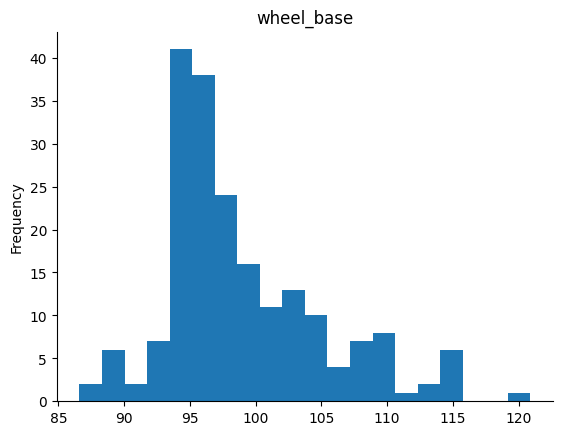

In [33]:
# @title wheel_base

from matplotlib import pyplot as plt
new_data_y['wheel_base'].plot(kind='hist', bins=20, title='wheel_base')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [32]:
# Example use of the function (ensure your DataFrame and model are correctly defined)
test_data_recommended = pd.DataFrame([{
    'make': 'audi', 'fuel_type': 'gas', 'body_style': 'sedan', 'drive_wheels': '4wd',
    'wheel_base': 80, 'length': 180, 'engine_size': 120, 'horsepower': 100}])

similar_cars = recommend_and_predict(test_data_recommended, new_data_y, model)
print("Recommended Similar Cars:")
print(similar_cars)

Predicted Price: 12634.06885047682
Recommended Similar Cars:
            make fuel_type   body_style drive_wheels  wheel_base  length  \
0    alfa-romero       gas  convertible          rwd        88.6   168.8   
1    alfa-romero       gas  convertible          rwd        88.6   168.8   
145       subaru       gas        sedan          4wd        97.0   172.0   
43         isuzu       gas        sedan          rwd        94.3   170.7   
144       subaru       gas        sedan          4wd        97.0   172.0   

     engine_size  horsepower    price  
0            130       111.0  13495.0  
1            130       111.0  16500.0  
145          108       111.0  11259.0  
43           111        78.0   6785.0  
144          108        82.0   9233.0  


#### **Conclusiones**

